In [1]:
import numpy as np

In [2]:
import seaborn as sns;


In [3]:
import matplotlib.pyplot as plt;


In [5]:
import pandas as pd

In [6]:
%matplotlib inline

In [7]:
dataset = pd.read_csv('iris.csv')

In [8]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset = dataset.drop('Id', axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
print(dataset.shape)

(150, 5)


In [12]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [13]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [14]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


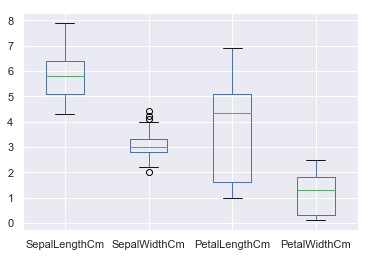

In [15]:
dataset.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04BCDFA90>,
      dtype=object)

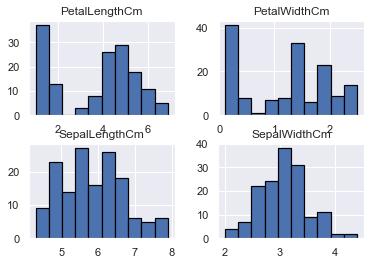

In [16]:
dataset.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F04DEFFF28>,
      dtype=object)

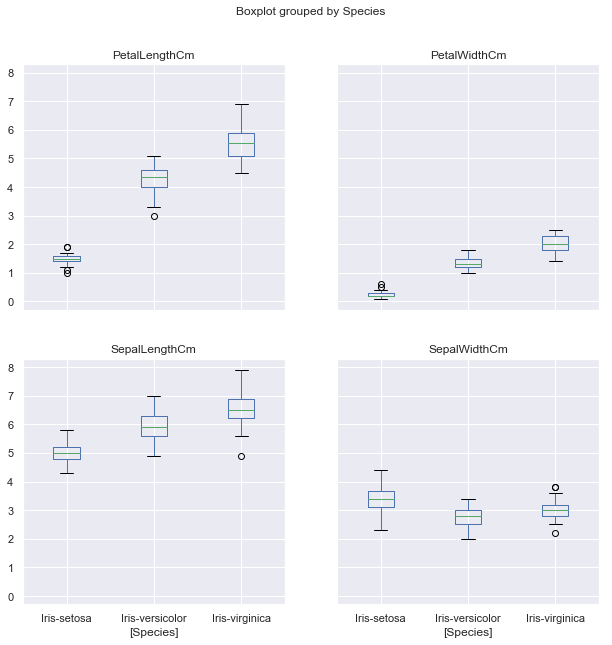

In [17]:
dataset.boxplot(by="Species", figsize=(10,10))

C:\Users\Victor Oko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


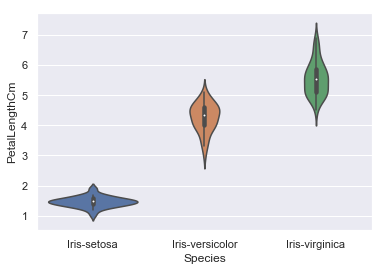

In [18]:
sns.violinplot(data=dataset, x="Species", y="PetalLengthCm")

In [19]:
from pandas.plotting import scatter_matrix

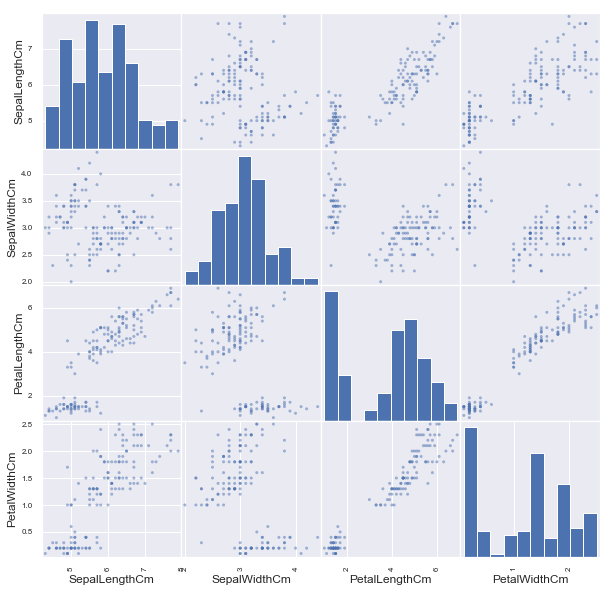

In [20]:
scatter_matrix(dataset,figsize=(10,10))
plt.show()

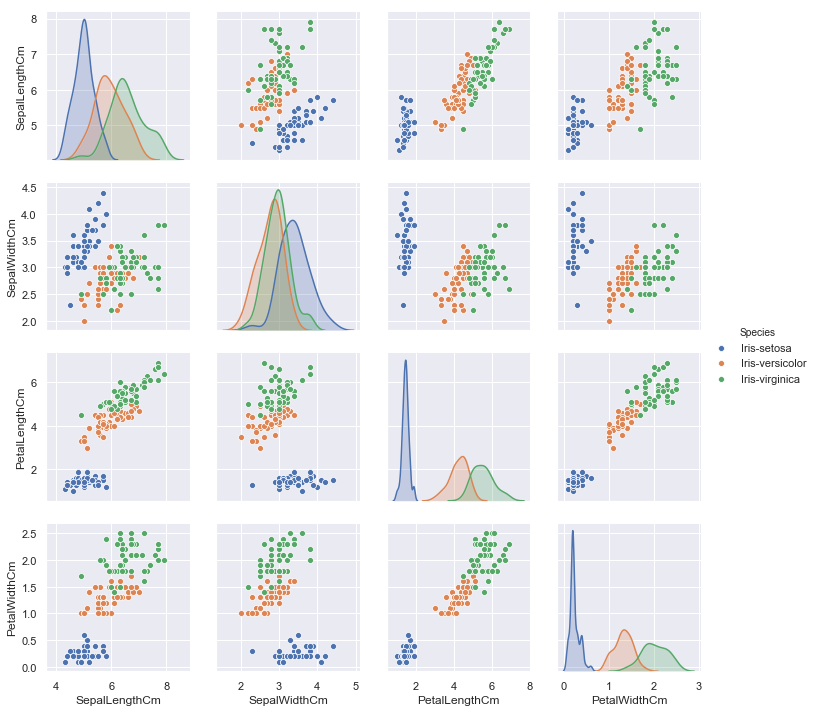

In [21]:
sns.pairplot(dataset, hue='Species')

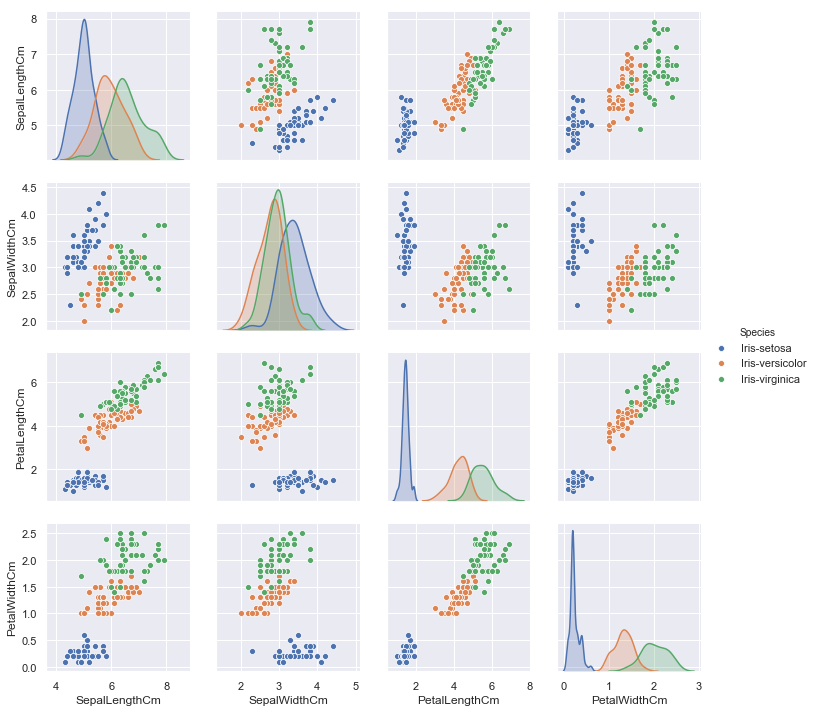

In [22]:
sns.pairplot(dataset, hue="Species", diag_kind="kde")

In [23]:
#Importing metrics for evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
# Separating the data into dependent and independent variables

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values




In [28]:
# Spliting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
classifier = LogisticRegression()

In [32]:
classifier.fit(X_train, y_train)

C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [36]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('accuracy is', accuracy_score(y_pred, y_test))

accuracy is 0.9666666666666667


In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
classifier = GaussianNB()

In [41]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [44]:
from sklearn.svm import SVC

In [45]:
classifier = SVC()

In [46]:
classifier.fit(X_train, y_train)

C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [49]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print('accuracy is', accuracy_score(y_pred, y_test))

accuracy is 1.0


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
classifier = KNeighborsClassifier(n_neighbors=8)

In [57]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [60]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print('accuracy is', accuracy_score(y_pred, y_test))

accuracy is 1.0


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
classifier = DecisionTreeClassifier()

In [65]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [68]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
print('accuracy is', accuracy_score(y_pred, y_test))

accuracy is 1.0
